### END 2 END NLP Project
+ Emotion detection in text
+ Text classifier

In [1]:
#Load EDA packages
import pandas as pd
import numpy as np

In [2]:
#Load Data Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Load text cleaning packages
import neattext.functions as nfx
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [4]:
#Load ML packages
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [5]:
#Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [6]:
# Load dataset
df = pd.read_csv('C:/Users/hp/Documents/NLP Projects/End2End-nlp-project/data/emotion_dataset_2.csv')

In [7]:
df = df.drop(['Clean_Text'],axis=1)

In [8]:
df.describe()

,Unnamed: 0
count,34792.000000
mean,17395.500000
std,10043.729619
min,0.000000
25%,8697.750000
50%,17395.500000
75%,26093.250000
max,34791.000000


## EDA

#### 1.Text Preparation

In [9]:
#Text cleaning

We will use NeatText functions which is a NLP package for cleaning textual data and text processing

In [10]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [11]:
#User handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [12]:
#Stop words
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)
#punctuations
df['Clean_Text'] = df['Text'].apply(nfx.remove_puncts)
#Emojis
df['Clean_Text'] = df['Text'].apply(nfx.remove_emojis)
#Urls
df['Clean_Text'] = df['Text'].apply(nfx.remove_urls)
#Special chracters
df['Clean_Text'] = df['Text'].apply(nfx.remove_special_characters)

In [13]:
df['Clean_Text']

0                                                    Why  
1           Sage Act upgrade on my to do list for tommorow
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3         Such an eye  The true hazel eyeand so brillia...
4        Iluvmiasantos ugh babe hugggzzz for u   babe n...
                               ...                        
34787    MichelGW have you gift Hope you like it Its ha...
34788    The world didnt give it to meso the world MOST...
34789                              A man robbed me today  
34790        Youu call it JEALOUSY I call it of Losing YOU
34791    I think about you baby and I dream about you a...
Name: Clean_Text, Length: 34792, dtype: object

In [14]:
#Lower case and stemming
stemmer=PorterStemmer()
for text in df['Clean_Text']:
    text = text.lower()
    text=text.split()
    
    text=[stemmer.stem(words)
          for words in text
              if words not in stopwords.words("english")
             ]
    text=" ".join(text)

#### 2.Data Understanding

In [15]:
df.shape

(34792, 4)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  34792 non-null  int64 
 1   Emotion     34792 non-null  object
 2   Text        34792 non-null  object
 3   Clean_Text  34792 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [17]:
df.columns

Index(['Unnamed: 0', 'Emotion', 'Text', 'Clean_Text'], dtype='object')

In [18]:
df['Emotion'].unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

"Emotion" is categorical variable that contains emotions expressed through the text and the emotions included in the data are:
['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame','disgust']

We can use this function that gives you a whole summary to about the description of your data:

In [19]:
def describe_data(data_type,data,label):
    print(data_type," DESCRIPTION")
    print("--------------------------")
    size=data.shape
    null_values=data.isnull().sum().sum()
    
    label_count=data[label].value_counts()
    print(data_type," shape:",size,"\n")
    print(data_type," contains:",null_values," null values\n")
    print("Label counts:")  
    print(label_count)
    print()
    
    print("*****",data_type," label count plot ****")
    sns.countplot(
        data=data,
        x=label
    )

Emotion_dataset:Training Data  DESCRIPTION
--------------------------
Emotion_dataset:Training Data  shape: (34792, 4) 

Emotion_dataset:Training Data  contains: 0  null values

Label counts:
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

***** Emotion_dataset:Training Data  label count plot ****


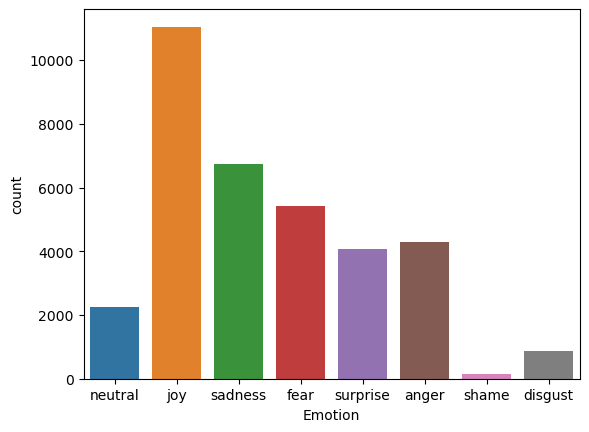

In [20]:
describe_data("Emotion_dataset:Training Data",df,"Emotion")

In [21]:
df.isnull().sum(axis=0).sort_values(ascending=False)

Unnamed: 0    0
Emotion       0
Text          0
Clean_Text    0
dtype: int64

In [22]:
df['Text'].describe()

count       34792
unique      31110
top        Yes . 
freq           76
Name: Text, dtype: object

In [23]:
no_missing_data = df.dropna(axis=0)

In [24]:
no_missing_data.isnull().sum()

Unnamed: 0    0
Emotion       0
Text          0
Clean_Text    0
dtype: int64

In [25]:
df = no_missing_data

In [26]:
df.isnull().sum()

Unnamed: 0    0
Emotion       0
Text          0
Clean_Text    0
dtype: int64

To handle our missing data we choose to delete the entire row that has the column "Clean_Text" value missing

Conclusion: our data is free of null values

In [27]:
df = df.drop(['Unnamed: 0'],axis=1)

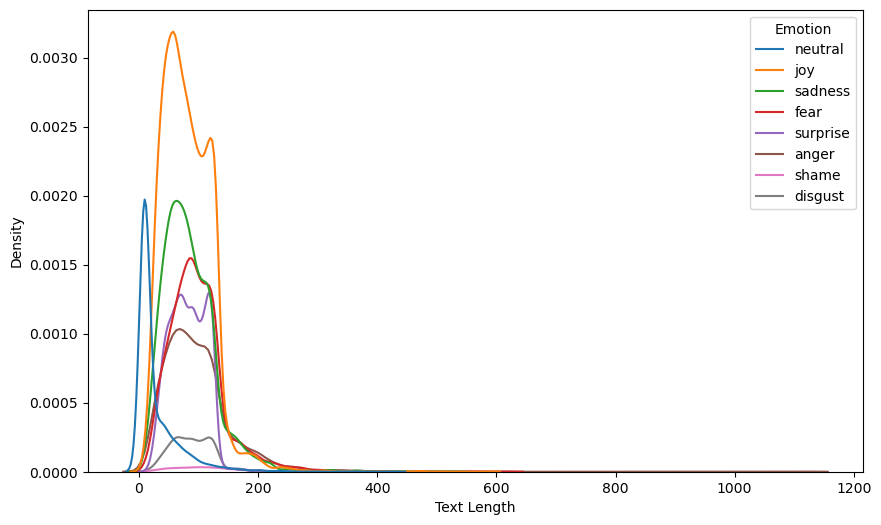

In [28]:
df["Text Length"]=df["Clean_Text"].apply(len)

fig=plt.figure(figsize=(10,6))

sns.kdeplot(
    x=df["Text Length"],
    hue=df["Emotion"]
)
plt.show()

We mark the distribution of text lengths using kdeplot

In [29]:
df[["Text Length"]].describe()

,Text Length
count,34792.000000
mean,83.059266
std,46.196116
min,4.000000
25%,51.000000
50%,79.000000
75%,111.000000
max,1124.000000


We have mininum text length of 1 and maximum length of 560 however most of them are concentrated in between 1-100

#### 3.Data Preparation

First, as you may notice the variable target "Emotion" contains object datatype, so we must convert our data into machine understandable form, for that we use label mapping:

In [30]:
df['Emotion'].unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

In [31]:
# create a label mapping dictionary
label_map = { "joy":0,
              "sadness":1,
              "fear":2,
              "surprise":3,
              "anger":4,
              "shame":5,
              "neutral":6,
              "disgust":7}

In [32]:
def label_encode(data,label):
    label=data[label].map(label_map)
    return label

In [33]:
# replace the values using the label mapping dictionary
df["label"] = label_encode(df, "Emotion")

In [34]:
df.head()

,Emotion,Text,Clean_Text,Text Length,label
0,neutral,Why ?,Why,6,6
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow,46,0
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...,97,1
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...,456,0
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Iluvmiasantos ugh babe hugggzzz for u babe n...,114,0


In [35]:
df = df.drop(["Text Length"],axis=1)

In [36]:
df

,Emotion,Text,Clean_Text,label
0,neutral,Why ?,Why,6
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow,0
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...,1
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...,0
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Iluvmiasantos ugh babe hugggzzz for u babe n...,0
...,...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,MichelGW have you gift Hope you like it Its ha...,3
34788,joy,The world didnt give it to me..so the world MO...,The world didnt give it to meso the world MOST...,0
34789,anger,A man robbed me today .,A man robbed me today,4
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call it JEALOUSY I call it of Losing YOU,2


#### 3.Feature Engineering

In [37]:
df

,Emotion,Text,Clean_Text,label
0,neutral,Why ?,Why,6
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow,0
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...,1
3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...,0
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Iluvmiasantos ugh babe hugggzzz for u babe n...,0
...,...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,MichelGW have you gift Hope you like it Its ha...,3
34788,joy,The world didnt give it to me..so the world MO...,The world didnt give it to meso the world MOST...,0
34789,anger,A man robbed me today .,A man robbed me today,4
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call it JEALOUSY I call it of Losing YOU,2


In [77]:
#Extracting features and label or target variable
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [78]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)


#### 4.Model Building

###### 4.1 Pipeline model

In [79]:
#Buikding Pipeline
from sklearn.pipeline import Pipeline

In [80]:
#Logistic regression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [81]:
# Train and Fit Data
pipe_lr.fit(x_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [82]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [83]:
#Check acuracy 
pipe_lr.score(x_test,y_test)

0.6338378999808393

In [84]:
#Make Prediction
ex1 = "This book is so interesting it made me happy"
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [85]:
#Predict Probability 
pipe_lr.predict_proba([ex1])

array([[3.91412497e-03, 7.91116362e-03, 1.29445193e-03, 9.07652068e-01,
        1.93313601e-03, 1.15410573e-02, 3.34880549e-05, 6.57205102e-02]])

In [86]:
#
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

As you can see the highest probability is class 'joy' for example ex1, that's why our model predicted as joy

In [87]:
#Save Model & ¨Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_2023.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

###### 4.2 NaiveBayes Model

In [74]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
mnb = MultinomialNB()
bnb = BernoulliNB()
mnb.fit(x_train, y_train)

ValueError: could not convert string to float: 'Dressing up tomorrow for basketball '

In [88]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

# Convert categorical/string labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

mnb = MultinomialNB()
mnb.fit(x_train, y_train_encoded)


ValueError: could not convert string to float: 'Dressing up tomorrow for basketball '